In [135]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns

In [136]:
df = pd.read_csv('Data/AviationData.csv', encoding= 'latin1', low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [137]:
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'FAR.Description',
                   'Schedule', 'Air.carrier', ]

df_clean = df.drop(columns=columns_to_drop)

In [138]:
df_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [139]:
new_column_names = {'vent.Id': 'ID', 'Investigation.Type': 'Type', 'Event.Date':'Date', 'Injury.Severity':'Injury_Severity', 
                    'Aircraft.damage':'Damage_type', 'Number.of.Engines':'Engines', 'Purpose.of.flight':'Flight_Purpose',
                    'Total.Fatal.Injuries':'Fatal_Injuries', 'Total.Serious.Injuries':'Serious_Injuries',
                   'Total.Minor.Injuries':'Minor_Injuries', 'Total.Uninjured':'Uninjured', 'Weather.Condition':'Weather',}
df_clean.rename(columns=new_column_names, inplace=True)

In [140]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%Y-%m-%d')
df_clean['Month'] = df_clean['Date'].dt.month
seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

df_clean['Season'] = df_clean['Month'].map(seasons)

In [141]:
df_clean['Year'] = df_clean['Date'].dt.year

In [142]:
df_us = df_us = df_clean[df_clean['Country'] == 'United States']
df_us.reset_index(drop=True, inplace=True)

In [143]:
valid_state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

def extract_city_state(location):
    if pd.notna(location):
        location = location.strip()
        last_two_chars = location[-2:].upper()
        if last_two_chars in valid_state_codes:
            return location[:-3].strip(), last_two_chars
        else:
            return location, "Not Applicable" # Some accidents have not happend in a particular state
    else:
        return np.nan, np.nan

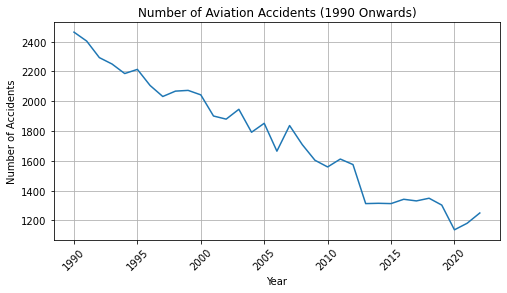

In [144]:
df_us_filtered = df_us[df_us['Year'] >= 1990]

accidents_by_year = df_us_filtered['Year'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(accidents_by_year.index, accidents_by_year.values, linestyle='-')
plt.title('Number of Aviation Accidents (1990 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [145]:
df_us_filtered

,Event.Id,Type,Accident.Number,Date,Location,Country,Injury_Severity,Damage_type,Aircraft.Category,Registration.Number,...,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Season,Year
24349,20001212X22389,Accident,CHI90LA059,1990-01-01,"ELKHART, IN",United States,Non-Fatal,Substantial,NaN,N8575G,...,0.0,0.0,2.0,VMC,Landing,Probable Cause,28-06-1991,1,Winter,1990
24350,20001212X22375,Accident,BFO90FA017,1990-01-02,"BALTIMORE, MD",United States,Non-Fatal,NaN,NaN,N109AA,...,3.0,7.0,247.0,VMC,Cruise,Probable Cause,08-12-1992,1,Winter,1990
24351,20001212X22482,Accident,NYC90LA044,1990-01-02,"MILLIS, MA",United States,Non-Fatal,Substantial,NaN,N9241U,...,0.0,1.0,0.0,VMC,Takeoff,Probable Cause,12-03-1993,1,Winter,1990
24352,20001212X22431,Accident,LAX90LA063B,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,NaN,N12963,...,0.0,0.0,5.0,VMC,Standing,Probable Cause,04-09-1992,1,Winter,1990
24353,20001212X22483,Accident,NYC90LA045,1990-01-03,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,NaN,N4636E,...,0.0,0.0,1.0,VMC,Cruise,Probable Cause,28-09-1992,1,Winter,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82243,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,12,Winter,2022
82244,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022
82245,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,12,Winter,2022
82246,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022


In [146]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [147]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [148]:
df_us_filtered = df_us_filtered.copy()

In [149]:
df_us_filtered.loc[:, 'Total_Passengers'] = df_us_filtered[['Serious_Injuries', 'Minor_Injuries', 'Fatal_Injuries', 'Uninjured']].sum(axis=1)

In [150]:
df_filtered = df_us_filtered

In [151]:
df_filtered

,Event.Id,Type,Accident.Number,Date,Location,Country,Injury_Severity,Damage_type,Aircraft.Category,Registration.Number,...,Minor_Injuries,Uninjured,Weather,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Season,Year,Total_Passengers
24349,20001212X22389,Accident,CHI90LA059,1990-01-01,"ELKHART, IN",United States,Non-Fatal,Substantial,NaN,N8575G,...,0.0,2.0,VMC,Landing,Probable Cause,28-06-1991,1,Winter,1990,2.0
24350,20001212X22375,Accident,BFO90FA017,1990-01-02,"BALTIMORE, MD",United States,Non-Fatal,NaN,NaN,N109AA,...,7.0,247.0,VMC,Cruise,Probable Cause,08-12-1992,1,Winter,1990,257.0
24351,20001212X22482,Accident,NYC90LA044,1990-01-02,"MILLIS, MA",United States,Non-Fatal,Substantial,NaN,N9241U,...,1.0,0.0,VMC,Takeoff,Probable Cause,12-03-1993,1,Winter,1990,1.0
24352,20001212X22431,Accident,LAX90LA063B,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,NaN,N12963,...,0.0,5.0,VMC,Standing,Probable Cause,04-09-1992,1,Winter,1990,5.0
24353,20001212X22483,Accident,NYC90LA045,1990-01-03,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,NaN,N4636E,...,0.0,1.0,VMC,Cruise,Probable Cause,28-09-1992,1,Winter,1990,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82243,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,0.0,0.0,NaN,NaN,NaN,29-12-2022,12,Winter,2022,1.0
82244,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022,0.0
82245,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,0.0,1.0,VMC,NaN,NaN,27-12-2022,12,Winter,2022,1.0
82246,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022,0.0


In [152]:
df_us_filtered['Type'].describe()

count        57899
unique           2
top       Accident
freq         56431
Name: Type, dtype: object

In [153]:
df_filtered = df_us_filtered[~df_us_filtered['Type'].str.contains('Incident', case=False, na=False)]

In [154]:
df_filtered

,Event.Id,Type,Accident.Number,Date,Location,Country,Injury_Severity,Damage_type,Aircraft.Category,Registration.Number,...,Minor_Injuries,Uninjured,Weather,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Season,Year,Total_Passengers
24349,20001212X22389,Accident,CHI90LA059,1990-01-01,"ELKHART, IN",United States,Non-Fatal,Substantial,NaN,N8575G,...,0.0,2.0,VMC,Landing,Probable Cause,28-06-1991,1,Winter,1990,2.0
24350,20001212X22375,Accident,BFO90FA017,1990-01-02,"BALTIMORE, MD",United States,Non-Fatal,NaN,NaN,N109AA,...,7.0,247.0,VMC,Cruise,Probable Cause,08-12-1992,1,Winter,1990,257.0
24351,20001212X22482,Accident,NYC90LA044,1990-01-02,"MILLIS, MA",United States,Non-Fatal,Substantial,NaN,N9241U,...,1.0,0.0,VMC,Takeoff,Probable Cause,12-03-1993,1,Winter,1990,1.0
24352,20001212X22431,Accident,LAX90LA063B,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,NaN,N12963,...,0.0,5.0,VMC,Standing,Probable Cause,04-09-1992,1,Winter,1990,5.0
24353,20001212X22483,Accident,NYC90LA045,1990-01-03,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,NaN,N4636E,...,0.0,1.0,VMC,Cruise,Probable Cause,28-09-1992,1,Winter,1990,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82243,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,0.0,0.0,NaN,NaN,NaN,29-12-2022,12,Winter,2022,1.0
82244,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022,0.0
82245,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,0.0,1.0,VMC,NaN,NaN,27-12-2022,12,Winter,2022,1.0
82246,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022,0.0


In [155]:
df_filtered = df_filtered.copy()
fill_nan= ['Fatal_Injuries', 'Serious_Injuries', 'Minor_Injuries', 'Uninjured']
df_filtered.loc[:, fill_nan] = df_filtered.loc[:, fill_nan].fillna(0)


In [156]:
df_filtered

,Event.Id,Type,Accident.Number,Date,Location,Country,Injury_Severity,Damage_type,Aircraft.Category,Registration.Number,...,Minor_Injuries,Uninjured,Weather,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Season,Year,Total_Passengers
24349,20001212X22389,Accident,CHI90LA059,1990-01-01,"ELKHART, IN",United States,Non-Fatal,Substantial,NaN,N8575G,...,0.0,2.0,VMC,Landing,Probable Cause,28-06-1991,1,Winter,1990,2.0
24350,20001212X22375,Accident,BFO90FA017,1990-01-02,"BALTIMORE, MD",United States,Non-Fatal,NaN,NaN,N109AA,...,7.0,247.0,VMC,Cruise,Probable Cause,08-12-1992,1,Winter,1990,257.0
24351,20001212X22482,Accident,NYC90LA044,1990-01-02,"MILLIS, MA",United States,Non-Fatal,Substantial,NaN,N9241U,...,1.0,0.0,VMC,Takeoff,Probable Cause,12-03-1993,1,Winter,1990,1.0
24352,20001212X22431,Accident,LAX90LA063B,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,NaN,N12963,...,0.0,5.0,VMC,Standing,Probable Cause,04-09-1992,1,Winter,1990,5.0
24353,20001212X22483,Accident,NYC90LA045,1990-01-03,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,NaN,N4636E,...,0.0,1.0,VMC,Cruise,Probable Cause,28-09-1992,1,Winter,1990,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82243,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,0.0,0.0,NaN,NaN,NaN,29-12-2022,12,Winter,2022,1.0
82244,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022,0.0
82245,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,0.0,1.0,VMC,NaN,NaN,27-12-2022,12,Winter,2022,1.0
82246,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022,0.0


In [157]:
df_filtered.describe()

,Engines,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Month,Year,Total_Passengers
count,54953.000000,56431.000000,56431.000000,56431.000000,56431.000000,56431.000000,56431.000000,56431.000000
mean,1.106855,0.363346,0.232993,0.277046,2.864844,6.619057,2003.988659,3.738229
std,0.378884,2.287551,1.132844,1.087609,18.092454,3.005936,9.364574,18.533367
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1990.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1996.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,7.000000,2003.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2012.000000,2.000000
max,8.000000,265.000000,137.000000,96.000000,699.000000,12.000000,2022.000000,699.000000


In [158]:
df_us_filtered.loc[:, 'Total_Passengers'] = df_us_filtered[['Serious_Injuries', 'Minor_Injuries', 'Fatal_Injuries', 'Uninjured']].sum(axis=1)

In [159]:
df_filtered

,Event.Id,Type,Accident.Number,Date,Location,Country,Injury_Severity,Damage_type,Aircraft.Category,Registration.Number,...,Minor_Injuries,Uninjured,Weather,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Season,Year,Total_Passengers
24349,20001212X22389,Accident,CHI90LA059,1990-01-01,"ELKHART, IN",United States,Non-Fatal,Substantial,NaN,N8575G,...,0.0,2.0,VMC,Landing,Probable Cause,28-06-1991,1,Winter,1990,2.0
24350,20001212X22375,Accident,BFO90FA017,1990-01-02,"BALTIMORE, MD",United States,Non-Fatal,NaN,NaN,N109AA,...,7.0,247.0,VMC,Cruise,Probable Cause,08-12-1992,1,Winter,1990,257.0
24351,20001212X22482,Accident,NYC90LA044,1990-01-02,"MILLIS, MA",United States,Non-Fatal,Substantial,NaN,N9241U,...,1.0,0.0,VMC,Takeoff,Probable Cause,12-03-1993,1,Winter,1990,1.0
24352,20001212X22431,Accident,LAX90LA063B,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,NaN,N12963,...,0.0,5.0,VMC,Standing,Probable Cause,04-09-1992,1,Winter,1990,5.0
24353,20001212X22483,Accident,NYC90LA045,1990-01-03,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,NaN,N4636E,...,0.0,1.0,VMC,Cruise,Probable Cause,28-09-1992,1,Winter,1990,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82243,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,0.0,0.0,NaN,NaN,NaN,29-12-2022,12,Winter,2022,1.0
82244,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022,0.0
82245,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,0.0,1.0,VMC,NaN,NaN,27-12-2022,12,Winter,2022,1.0
82246,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022,0.0


In [160]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56431 entries, 24349 to 82247
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event.Id               56431 non-null  object        
 1   Type                   56431 non-null  object        
 2   Accident.Number        56431 non-null  object        
 3   Date                   56431 non-null  datetime64[ns]
 4   Location               56424 non-null  object        
 5   Country                56431 non-null  object        
 6   Injury_Severity        56379 non-null  object        
 7   Damage_type            55540 non-null  object        
 8   Aircraft.Category      24056 non-null  object        
 9   Registration.Number    56428 non-null  object        
 10  Make                   56425 non-null  object        
 11  Model                  56419 non-null  object        
 12  Amateur.Built          56417 non-null  object        
 1

In [161]:
df_filtered

,Event.Id,Type,Accident.Number,Date,Location,Country,Injury_Severity,Damage_type,Aircraft.Category,Registration.Number,...,Minor_Injuries,Uninjured,Weather,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Season,Year,Total_Passengers
24349,20001212X22389,Accident,CHI90LA059,1990-01-01,"ELKHART, IN",United States,Non-Fatal,Substantial,NaN,N8575G,...,0.0,2.0,VMC,Landing,Probable Cause,28-06-1991,1,Winter,1990,2.0
24350,20001212X22375,Accident,BFO90FA017,1990-01-02,"BALTIMORE, MD",United States,Non-Fatal,NaN,NaN,N109AA,...,7.0,247.0,VMC,Cruise,Probable Cause,08-12-1992,1,Winter,1990,257.0
24351,20001212X22482,Accident,NYC90LA044,1990-01-02,"MILLIS, MA",United States,Non-Fatal,Substantial,NaN,N9241U,...,1.0,0.0,VMC,Takeoff,Probable Cause,12-03-1993,1,Winter,1990,1.0
24352,20001212X22431,Accident,LAX90LA063B,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,NaN,N12963,...,0.0,5.0,VMC,Standing,Probable Cause,04-09-1992,1,Winter,1990,5.0
24353,20001212X22483,Accident,NYC90LA045,1990-01-03,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,NaN,N4636E,...,0.0,1.0,VMC,Cruise,Probable Cause,28-09-1992,1,Winter,1990,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82243,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,0.0,0.0,NaN,NaN,NaN,29-12-2022,12,Winter,2022,1.0
82244,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022,0.0
82245,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,0.0,1.0,VMC,NaN,NaN,27-12-2022,12,Winter,2022,1.0
82246,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022,0.0


In [162]:
uninjured_index = df_filtered.columns.get_loc('Uninjured')

In [163]:
total_passengers = df_filtered.pop('Total_Passengers')
df_filtered.insert(uninjured_index + 1, 'Total_Passengers', total_passengers)

In [164]:
df_filtered

,Event.Id,Type,Accident.Number,Date,Location,Country,Injury_Severity,Damage_type,Aircraft.Category,Registration.Number,...,Minor_Injuries,Uninjured,Total_Passengers,Weather,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Season,Year
24349,20001212X22389,Accident,CHI90LA059,1990-01-01,"ELKHART, IN",United States,Non-Fatal,Substantial,NaN,N8575G,...,0.0,2.0,2.0,VMC,Landing,Probable Cause,28-06-1991,1,Winter,1990
24350,20001212X22375,Accident,BFO90FA017,1990-01-02,"BALTIMORE, MD",United States,Non-Fatal,NaN,NaN,N109AA,...,7.0,247.0,257.0,VMC,Cruise,Probable Cause,08-12-1992,1,Winter,1990
24351,20001212X22482,Accident,NYC90LA044,1990-01-02,"MILLIS, MA",United States,Non-Fatal,Substantial,NaN,N9241U,...,1.0,0.0,1.0,VMC,Takeoff,Probable Cause,12-03-1993,1,Winter,1990
24352,20001212X22431,Accident,LAX90LA063B,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,NaN,N12963,...,0.0,5.0,5.0,VMC,Standing,Probable Cause,04-09-1992,1,Winter,1990
24353,20001212X22483,Accident,NYC90LA045,1990-01-03,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,NaN,N4636E,...,0.0,1.0,1.0,VMC,Cruise,Probable Cause,28-09-1992,1,Winter,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82243,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,0.0,0.0,1.0,NaN,NaN,NaN,29-12-2022,12,Winter,2022
82244,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022
82245,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,0.0,1.0,1.0,VMC,NaN,NaN,27-12-2022,12,Winter,2022
82246,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022


In [165]:
df_filtered['Amateur.Built']

24349    No
24350    No
24351    No
24352    No
24353    No
         ..
82243    No
82244    No
82245    No
82246    No
82247    No
Name: Amateur.Built, Length: 56431, dtype: object

In [166]:
df_filtered = df_filtered[df_filtered['Amateur.Built'] == 'No']

In [167]:
df_filtered

,Event.Id,Type,Accident.Number,Date,Location,Country,Injury_Severity,Damage_type,Aircraft.Category,Registration.Number,...,Minor_Injuries,Uninjured,Total_Passengers,Weather,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Season,Year
24349,20001212X22389,Accident,CHI90LA059,1990-01-01,"ELKHART, IN",United States,Non-Fatal,Substantial,NaN,N8575G,...,0.0,2.0,2.0,VMC,Landing,Probable Cause,28-06-1991,1,Winter,1990
24350,20001212X22375,Accident,BFO90FA017,1990-01-02,"BALTIMORE, MD",United States,Non-Fatal,NaN,NaN,N109AA,...,7.0,247.0,257.0,VMC,Cruise,Probable Cause,08-12-1992,1,Winter,1990
24351,20001212X22482,Accident,NYC90LA044,1990-01-02,"MILLIS, MA",United States,Non-Fatal,Substantial,NaN,N9241U,...,1.0,0.0,1.0,VMC,Takeoff,Probable Cause,12-03-1993,1,Winter,1990
24352,20001212X22431,Accident,LAX90LA063B,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,NaN,N12963,...,0.0,5.0,5.0,VMC,Standing,Probable Cause,04-09-1992,1,Winter,1990
24353,20001212X22483,Accident,NYC90LA045,1990-01-03,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,NaN,N4636E,...,0.0,1.0,1.0,VMC,Cruise,Probable Cause,28-09-1992,1,Winter,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82243,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,0.0,0.0,1.0,NaN,NaN,NaN,29-12-2022,12,Winter,2022
82244,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022
82245,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,0.0,1.0,1.0,VMC,NaN,NaN,27-12-2022,12,Winter,2022
82246,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022


In [171]:
df_filtered['Injury_Severity'].describe

<bound method NDFrame.describe of 24349    Non-Fatal
24350    Non-Fatal
24351    Non-Fatal
24352    Non-Fatal
24353    Non-Fatal
           ...    
82243        Minor
82244          NaN
82245    Non-Fatal
82246          NaN
82247        Minor
Name: Injury_Severity, Length: 49753, dtype: object>

In [172]:
df_filtered['Injury_Severity'].value_counts()

Non-Fatal      40558
Fatal           2908
Fatal(1)        2882
Fatal(2)        1813
Fatal(3)         588
Fatal(4)         373
Minor            181
Serious          133
Fatal(5)         109
Fatal(6)          56
Fatal(7)          22
Unavailable       13
Fatal(8)          13
Fatal(10)         10
Fatal(9)           4
Fatal(11)          3
Fatal(12)          3
Fatal(14)          3
Fatal(13)          2
Fatal(34)          2
Fatal(18)          2
Fatal(49)          1
Fatal(29)          1
Fatal(92)          1
Fatal(27)          1
Fatal(15)          1
Fatal(37)          1
Fatal(23)          1
Fatal(132)         1
Fatal(16)          1
Fatal(110)         1
Fatal(25)          1
Fatal(265)         1
Fatal(68)          1
Fatal(88)          1
Fatal(230)         1
Fatal(228)         1
Fatal(20)          1
Fatal(73)          1
Fatal(64)          1
Fatal(21)          1
Fatal(19)          1
Fatal(44)          1
Fatal(65)          1
Name: Injury_Severity, dtype: int64

In [175]:
df_filtered['Injury_Severity'] = df_filtered['Injury_Severity'].replace(to_replace=r'Fatal.*', value='Fatal', regex=True)
df_filtered['Injury_Severity'].value_counts()

<ipython-input-175-a66c456841f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Injury_Severity'] = df_filtered['Injury_Severity'].replace(to_replace=r'Fatal.*', value='Fatal', regex=True)


Non-Fatal      40558
Fatal           8816
Minor            181
Serious          133
Unavailable       13
Name: Injury_Severity, dtype: int64

In [176]:
df_filtered

,Event.Id,Type,Accident.Number,Date,Location,Country,Injury_Severity,Damage_type,Aircraft.Category,Registration.Number,...,Minor_Injuries,Uninjured,Total_Passengers,Weather,Broad.phase.of.flight,Report.Status,Publication.Date,Month,Season,Year
24349,20001212X22389,Accident,CHI90LA059,1990-01-01,"ELKHART, IN",United States,Non-Fatal,Substantial,NaN,N8575G,...,0.0,2.0,2.0,VMC,Landing,Probable Cause,28-06-1991,1,Winter,1990
24350,20001212X22375,Accident,BFO90FA017,1990-01-02,"BALTIMORE, MD",United States,Non-Fatal,NaN,NaN,N109AA,...,7.0,247.0,257.0,VMC,Cruise,Probable Cause,08-12-1992,1,Winter,1990
24351,20001212X22482,Accident,NYC90LA044,1990-01-02,"MILLIS, MA",United States,Non-Fatal,Substantial,NaN,N9241U,...,1.0,0.0,1.0,VMC,Takeoff,Probable Cause,12-03-1993,1,Winter,1990
24352,20001212X22431,Accident,LAX90LA063B,1990-01-03,"APPLE VALLEY, CA",United States,Non-Fatal,Minor,NaN,N12963,...,0.0,5.0,5.0,VMC,Standing,Probable Cause,04-09-1992,1,Winter,1990
24353,20001212X22483,Accident,NYC90LA045,1990-01-03,"SLIPPERY ROCK, PA",United States,Non-Fatal,Substantial,NaN,N4636E,...,0.0,1.0,1.0,VMC,Cruise,Probable Cause,28-09-1992,1,Winter,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82243,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,0.0,0.0,1.0,NaN,NaN,NaN,29-12-2022,12,Winter,2022
82244,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022
82245,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,0.0,1.0,1.0,VMC,NaN,NaN,27-12-2022,12,Winter,2022
82246,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,12,Winter,2022


In [177]:
df_filtered['Injury_Severity']

24349    Non-Fatal
24350    Non-Fatal
24351    Non-Fatal
24352    Non-Fatal
24353    Non-Fatal
           ...    
82243        Minor
82244          NaN
82245    Non-Fatal
82246          NaN
82247        Minor
Name: Injury_Severity, Length: 49753, dtype: object